In [1]:
%pip install --quiet pillow==9.3.0 numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

from IPython.display import display
from PIL import Image, ImageDraw
from voronoiville import voronoi, BoundingBox


Photo by <a href="https://unsplash.com/@campanellabruno?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Lera Nekrashevich</a> on <a href="https://unsplash.com/photos/Yd59eQJVYAo?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

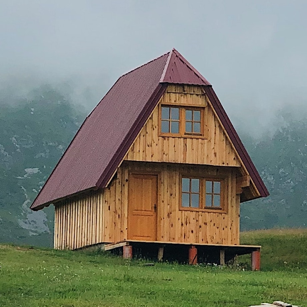

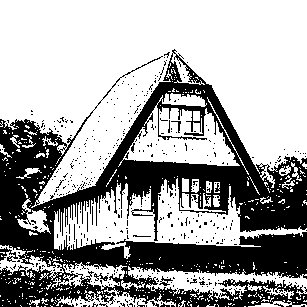

In [3]:
with Image.open("cropped-lera-nekrashevich-Yd59eQJVYAo-unsplash.jpg") as im:
    downscale = 3
    w, h = (im.width // downscale, im.height // downscale)
    resized = im.resize((w, h))
    flatten = resized.convert(mode="L")
    scale = Image.fromarray(np.array(flatten) > 105)
    dithered = scale.convert(mode="1")
display(resized)
display(dithered)


In [4]:
point_array = np.array(dithered)
# remember in this array x/y get flipped, np.nonzero returns the values
# for each dimension. dimension=0 is "rows", which is the y-value

# Since these are integers, we will add some random noise to them, otherwise we get an error
# of 'Edge crosses box, intersection must exist.'
points = [
    (x + np.random.random() * 0.05, y + np.random.random() * 0.05)
    for (y, x) in zip(*np.nonzero(point_array == 0))
]


In [5]:
cells = voronoi(points, BoundingBox(0, 0, w, h), lloyd_relaxation_iterations=0)


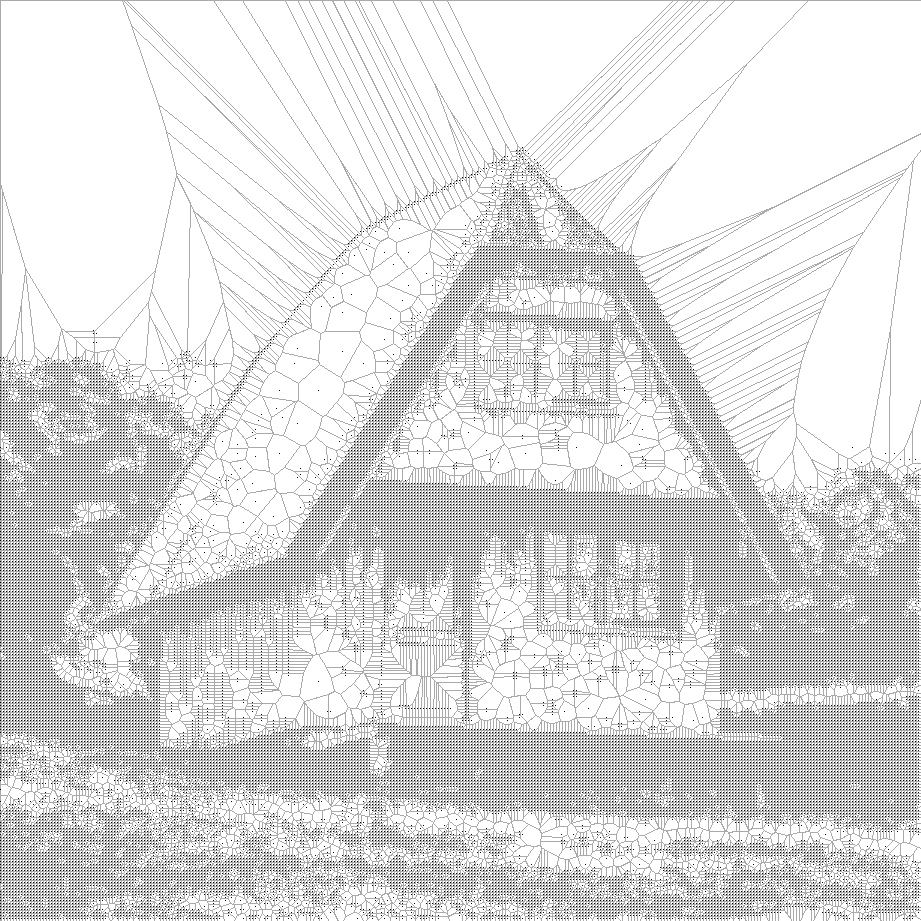

In [6]:
upscale = 3
img = Image.new("RGB", (w * upscale, h * upscale), "#FFFFFF")
img1 = ImageDraw.Draw(img)
for cell in cells:
    img1.polygon(
        [(x * upscale, y * upscale) for (x, y) in cell.vertices],
        fill="#FFFFFF",
        outline="#aaaaaa",
        width=1,
    )
    img1.point(
        (cell.position[0] * upscale, cell.position[1] * upscale),
        fill="#000000"
    )
img.save("voronoiville.png")
img


In [7]:
images = []
for i in range(75):
    cells = voronoi(points, BoundingBox(0, 0, w, h), lloyd_relaxation_iterations=i)
    upscale = 2
    img = Image.new("RGB", (w * upscale, h * upscale), "#FFFFFF")
    draw = ImageDraw.Draw(img)
    for cell in cells:
        draw.polygon(
            [(x * upscale, y * upscale) for (x, y) in cell.vertices],
            fill="#FFFFFF",
            outline="#e2e2e2",
            width=1,
        )
        draw.point(
            (cell.position[0] * upscale, cell.position[1] * upscale),
            fill="#000000",
        )
    images.append(img)
images[0].save(
    "looping_lloyd_relaxation.gif",
    save_all=True,
    append_images=images[1:] + list(reversed(images))[1:-1],
    duration=1,
    loop=0,
)
